<a href="https://colab.research.google.com/github/Rubnserrano/DataScience/blob/main/MNIST_Basic_Tensor_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp /kaggle.json ~/.kaggle


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download digit-recognizer


  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 168MB/s]


In [ ]:
!ls

digit-recognizer.zip  sample_data


In [ ]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [162]:
import pandas as pd
!ls
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
y_train = train['label'] 
X_train = train.drop('label', axis=1)
train.info()

digit-recognizer.zip  sample_data  sample_submission.csv  test.csv  train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


[757, 78, 584, 605, 423, 249]


<Figure size 360x360 with 0 Axes>

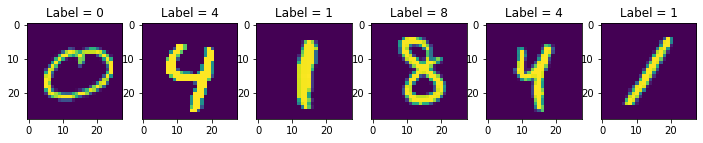

In [ ]:
import random
plt.figure(figsize=(5,5))
def visualizacion(n=3,imgs=X_train_tensor, labels=y_train):
  plt.figure(figsize=(2*n,2*n))
  r_indexes=[]
  for i in range(n): r_indexes.append(random.randint(0,imgs.shape[1]))
  print(r_indexes)

  for j in range(n):
    plt.subplot(1,n,j+1) 
    plt.imshow(imgs[r_indexes[j],:].numpy().reshape((28,28)))
    plt.title(f'Label = {labels[r_indexes[j]]}')

visualizacion(6)

In [227]:
X_train_tensor = tf.Variable(X_train)
X_test_tensor = tf.Variable(test)
y_train_tensor = tf.Variable(y_train)
X_train = tf.reshape(X_train_tensor, [-1,image_width , image_height])
X_test = tf.reshape(X_test_tensor, [-1,image_width , image_height])
y_train = tf.Variable(y_train)


In [228]:
X_train.shape, X_test.shape, y_train.shape
X_train = X_train.numpy()
X_test = X_test.numpy()
y_train = y_train.numpy()
X_train.shape, X_test.shape, y_train.shape

((42000, 28, 28), (28000, 28, 28), (42000,))

In [231]:
image_width = 28
image_height = 28
X_train_tensor = tf.reshape(X_train_tensor, [-1,image_width , image_height])
X_test_tensor = tf.reshape(X_test_tensor, [-1,image_width , image_height])

In [232]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(25, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.9956 - accuracy: 0.7520
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3410 - accuracy: 0.9021
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2645 - accuracy: 0.9241
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2268 - accuracy: 0.9343
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2026 - accuracy: 0.9410
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1815 - accuracy: 0.9463
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1646 - accuracy: 0.9515
Epoch 8/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1517 - accuracy: 0.9547
Epoch 9/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1457 - accuracy: 0.9572
Epoch 10/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.129

In [222]:
# y_preds = model.predict(X_test)
train2 = pd.read_csv('train.csv')
test2 = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')
predicciones = []
numbers = [0,1,2,3,4,5,6,7,8,9]
for i in range(X_test.shape[0]):
  predicciones.append(numbers[y_preds[i].argmax()])

# sample_sub['label'] = numbers[y_preds[].argmax()]
submission = pd.DataFrame({'ImageId': sample_sub.ImageId.to_list(),
                           'Label': predicciones})
submission

In [226]:
PATH_ = 'C:\\Users\Cosas\OneDrive\Escritorio\Data_Science\mnist'
# submission.to_csv(index=False)
from google.colab import files
submission.to_csv('output.csv', index=False) 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [144]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 784)               0         
                                                                 
 dense_70 (Dense)            (None, 4)                 3140      
                                                                 
 dense_71 (Dense)            (None, 4)                 20        
                                                                 
 dense_72 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
